In [48]:
%%capture
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split

# Text Pre-processing libraries
import nltk
import string
import warnings
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

# Tensorflow imports to build the model.
import tensorflow as tf
from tensorflow import keras
from keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('wordnet')
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
df = pd.read_csv("D:/COLLEGE/reseach_project/labeled_data.csv/hate_text.csv")
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,comments
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [51]:
df.shape

(24783, 7)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   comments            24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


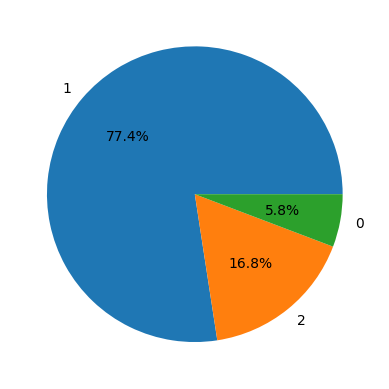

In [134]:
import matplotlib.pyplot as plt
plt.pie(df['class'].value_counts().values,
		labels = df['class'].value_counts().index,
		autopct='%1.1f%%')
plt.show()

In [ ]:
import string
# Lower case all the words of the comment before any preprocessing
df['comments'] = df['comments'].str.lower()

# Removing punctuations present in the text
punctuations_list = string.punctuation
def remove_punctuations(text):
	temp = str.maketrans('', '', punctuations_list)
	return text.translate(temp)

df['comments']= df['comments'].apply(lambda x: remove_punctuations(x))
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,comments
0,0,3,0,0,3,2,rt mayasolovely woman shouldnt complain cleani...
1,1,3,0,3,0,1,rt mleew17 boy dats coldtyga dwn bad cuffin da...
2,2,3,0,3,0,1,rt urkindofbrand dawg rt 80sbaby4life ever fuc...
3,3,3,0,2,1,1,rt cganderson vivabased look like tranny
4,4,6,0,6,0,1,rt shenikaroberts shit hear might true might f...


In [138]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

def remove_stopwords(text):
	stop_words = stopwords.words('english')

	imp_words = []

	# Storing the important words
	for word in str(text).split():

		if word not in stop_words:

			# Let's Lemmatize the word as well
			# before appending to the imp_words list.

			lemmatizer = WordNetLemmatizer()
			lemmatizer.lemmatize(word)

			imp_words.append(word)

	output = " ".join(imp_words)

	return output


df['comments'] = df['comments'].apply(lambda text: remove_stopwords(text))
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,comments
0,0,3,0,0,3,2,rt mayasolovely woman shouldnt complain cleani...
1,1,3,0,3,0,1,rt mleew17 boy dats coldtyga dwn bad cuffin da...
2,2,3,0,3,0,1,rt urkindofbrand dawg rt 80sbaby4life ever fuc...
3,3,3,0,2,1,1,rt cganderson vivabased look like tranny
4,4,6,0,6,0,1,rt shenikaroberts shit hear might true might f...


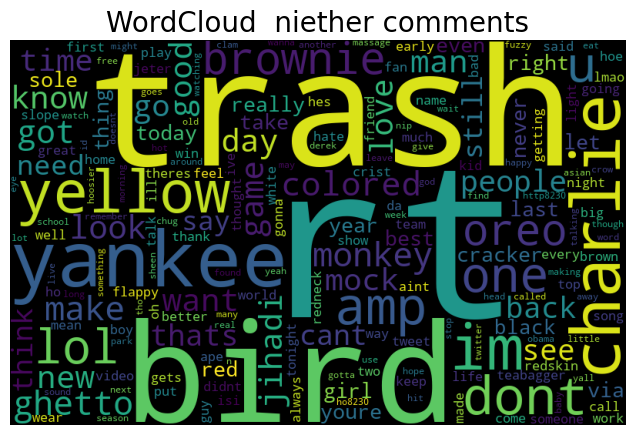

In [141]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
from wordcloud import STOPWORDS
def plot_word_cloud(data, typ):
  # Joining all the comments to get the corpus
  comments_corpus = " ".join(data['comments'].astype(str))

  plt.figure(figsize = (10,5))

  # Forming the word cloud
  wc = WordCloud(max_words = 200,
                width = 800,
                height = 500,
                background_color='black',
                stopwords=STOPWORDS,
                collocations = False).generate(comments_corpus)

  # Plotting the wordcloud obtained above
  plt.title(f'WordCloud  niether comments', fontsize = 20)
  plt.axis('off')
  plt.imshow(wc)
  plt.show()
  print()

plot_word_cloud(df[df['class']==2], 'Niether')





In [ ]:
class_2 = df[df['class'] == 2]                            #neither
class_1 = df[df['class'] == 1].sample(n=3500)            #offensive
class_0 = df[df['class'] == 0]                           #hate speech

balanced_df = pd.concat([class_0, class_0, class_0, class_1, class_2], axis=0)

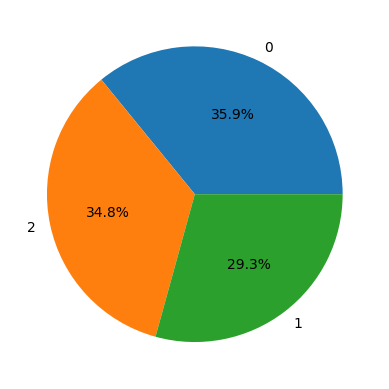

In [143]:
plt.pie(balanced_df['class'].value_counts().values,
        labels=balanced_df['class'].value_counts().index,
        autopct='%1.1f%%')
plt.show()

In [144]:
from sklearn.model_selection import train_test_split
features = balanced_df['comments']
target = balanced_df['class']

X_train, X_val, Y_train, Y_val = train_test_split(features,
                                                  target,
                                                  test_size=0.2,
                                                  random_state=22)
X_train.shape, X_val.shape

((9562,), (2391,))

In [145]:
Y_train = pd.get_dummies(Y_train)
Y_val = pd.get_dummies(Y_val)
Y_train.shape, Y_val.shape

((9562, 3), (2391, 3))

In [146]:
from tensorflow.keras.preprocessing.text import Tokenizer

max_words = 5000
max_len = 100

token = Tokenizer(num_words=max_words,
                  lower=True,
                  split=' ')

token.fit_on_texts(X_train)

In [147]:
# training the tokenizer
max_words = 5000
token = Tokenizer(num_words=max_words,
                lower=True,
                split=' ')
token.fit_on_texts(X_train)

#Generating token embeddings
Training_seq = token.texts_to_sequences(X_train)
Training_pad = pad_sequences(Training_seq,
                            maxlen=50,
                            padding='post',
                            truncating='post')

Testing_seq = token.texts_to_sequences(X_val)
Testing_pad = pad_sequences(Testing_seq,
                            maxlen=50,
                            padding='post',
                            truncating='post')

In [156]:
model = keras.models.Sequential([
    layers.Embedding(max_words, 32, input_length=max_len),
    layers.Bidirectional(layers.LSTM(16)),
    layers.Dense(512, activation='relu', kernel_regularizer='l1'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(3, activation='softmax')
])

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.build(input_shape=(None, max_len))

model.summary()

Model: "sequential_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_28 (Embedding)        │ (None, 100, 32)        │       160,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_36                │ (None, 32)             │         6,272 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_62 (Dense)                │ (None, 512)            │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_36          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_48 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_63 (Dense)                │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 186,755 (729.51 KB)

 Trainable params: 185,731 (725.51 KB)

 Non-trainable params: 1,024 (4.00 KB)

In [157]:
# Add a dummy input to build the model
model.build((None, max_len))

keras.utils.plot_model(
    model,
    show_shapes=True,
    show_dtype=True,
    show_layer_activations=True
)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [158]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

es = EarlyStopping(patience=3,
                   monitor = 'val_accuracy',
                   restore_best_weights = True)

lr = ReduceLROnPlateau(patience = 2,
                       monitor = 'val_loss',
                       factor = 0.5,
                       verbose = 0)


In [159]:
# Instantiate Tokenizer
tokenizer = Tokenizer(num_words=max_words)

# Fit on training data
tokenizer.fit_on_texts(X_train)

# Convert text to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)

# Pad sequences for uniform length
from tensorflow.keras.utils import pad_sequences
X_train_padded = pad_sequences(X_train_seq, maxlen=max_len)
X_val_padded = pad_sequences(X_val_seq, maxlen=max_len)

# Now use X_train_padded and X_val_padded in your model.fit()
history = model.fit(X_train_padded, Y_train,
                    validation_data=(X_val_padded, Y_val),
                    epochs=50,
                    verbose=1,
                    batch_size=32,
                    callbacks=[lr, es])

Epoch 1/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.6644 - loss: 3.7957 - val_accuracy: 0.6683 - val_loss: 0.9808 - learning_rate: 0.0010
Epoch 2/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.9021 - loss: 0.3622 - val_accuracy: 0.8712 - val_loss: 0.5068 - learning_rate: 0.0010
Epoch 3/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 11s 37ms/step - accuracy: 0.9376 - loss: 0.2685 - val_accuracy: 0.8724 - val_loss: 0.4759 - learning_rate: 0.0010
Epoch 4/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 12s 39ms/step - accuracy: 0.9556 - loss: 0.2078 - val_accuracy: 0.8252 - val_loss: 0.6303 - learning_rate: 0.0010
Epoch 5/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 13s 42ms/step - accuracy: 0.9669 - loss: 0.1603 - val_accuracy: 0.8323 - val_loss: 0.6919 - learning_rate: 0.0010
Epoch 6/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 12s 40ms/step - accuracy: 0.9760 - loss: 0.1205 - val_accuracy: 0.8800 - val_loss: 0.5033 - learning_rate: 5.0000e-04
Epoch 7/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 11s 38ms/step - accuracy: 0.9821 -

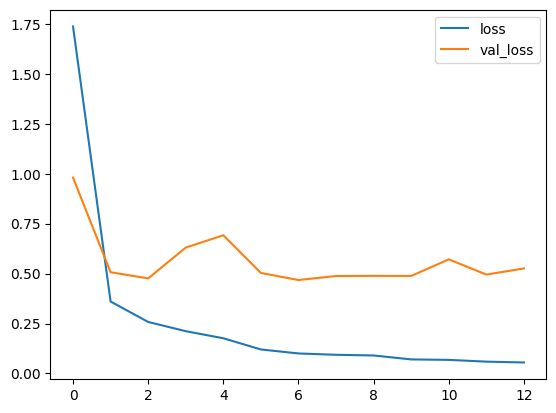

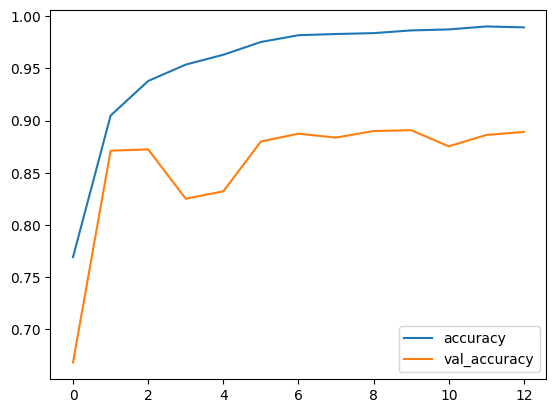

In [160]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
plt.show()